In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ace_tools as tools

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
#procedo a analizar el ultimo csv que tenemos aunque no sea el final para decidir que columnas son las mas importantes y clasificarlas.
file_path = "Streamlit/data/df_alquileres_ordenado_ccaa.csv"
df = pd.read_csv(file_path)
df.head()

In [ ]:
#compruebo los valores vacios o nans que tenemos y los ordeno de mayor a menor ya que tenemos 58 columnas la mayoria vacias y la mayoria irrelevantes a la hora de  crear nuestro modelo
valores_vacios = (df.isnull().sum() / len(df)) * 100
df_porcentaje = pd.DataFrame({'Columna': valores_vacios.index, 'Porcentaje_NaNs': valores_vacios.values})
df_porcentaje = df_porcentaje.sort_values(by='Porcentaje_NaNs', ascending=False)
df_porcentaje

,Columna,Porcentaje_NaNs
53,alcantarillado,99.992001
16,telefono,97.592385
52,calle_alumbrada,97.392417
51,calle_asfaltada,97.344425
35,interior,97.256439
8,tipo_de_casa,97.144457
32,chimenea,96.344585
54,urbanizado,94.672852
41,luz,93.249080
19,superficie_solar,93.001120


In [ ]:
#he seleccionado estas columnas,son las 29 primeras con mayor numero de nans, como podeis observar arriba
columnas_a_borrar = [
    "alcantarillado", "telefono", "calle_alumbrada", "calle_asfaltada", "interior", "tipo_de_casa", "chimenea",
    "urbanizado", "luz", "superficie_solar", "adaptado_a_personas_con_movilidad_reducida", "sistema_de_seguridad",
    "carpinteria_interior", "gas", "portero_automatico", "gastos_de_comunidad", "soleado", "vidrios_dobles",
    "trastero", "balcon", "lavadero", "carpinteria_exterior", "se_aceptan_mascotas", "puerta_blindada",
    "agua", "garaje", "comedor", "piscina", "tipo_suelo", "exterior"]
#cuando nos juntemos todos podemos comprobar mas o pruebo con las restantes un corr.

In [ ]:
df = df.drop(columns=[col for col in columnas_a_borrar if col in df.columns], errors='ignore')
df.shape

(12502, 28)

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
csv_file_path = "pruebaE.csv"
df.to_csv(csv_file_path, index=False)

In [ ]:
df.dtypes


identificador             object
nombre                    object
href                      object
agencia                   object
timestamp                 object
ubicacion                 object
CCAA                      object
codigo_postal            float64
planta                   float64
orientacion               object
precio                   float64
precio_m2                float64
antiguedad                object
actualizacion             object
superficie_util          float64
superficie_construida    float64
superficie               float64
habitaciones             float64
baños                    float64
cocina_equipada           object
amueblado                 object
terraza                   object
armarios_empotrados       object
calefaccion               object
aire_acondicionado        object
ascensor                  object
consumo                   object
emisiones                 object
dtype: object

In [ ]:
df_numerico = df.select_dtypes(include=['number'])
correlation_matrix = df_numerico.corr()

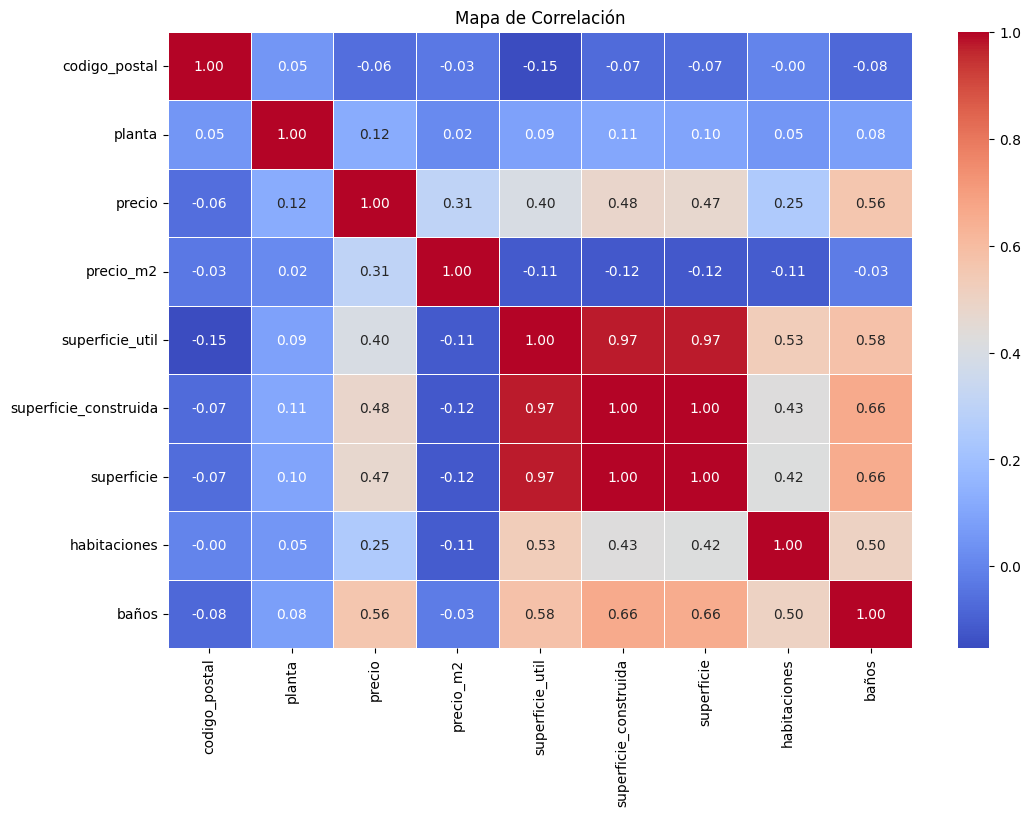

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación")
plt.show()

In [ ]:
#ha simple vista podemos observar que las columnas numericas con mayor relacion al precio  son las superficies que pueden ser redundantes al proporcionar el mismo tipo de informacion
#y por el contrario las que menos serian planta, codigo postal, precio por metro cuadrado que en principio deberia ser relevante y habitaciones


C:\Users\kikeg\AppData\Local\Temp\ipykernel_21420\1940670291.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlaciones_precio.index, y=correlaciones_precio.values, palette="coolwarm")


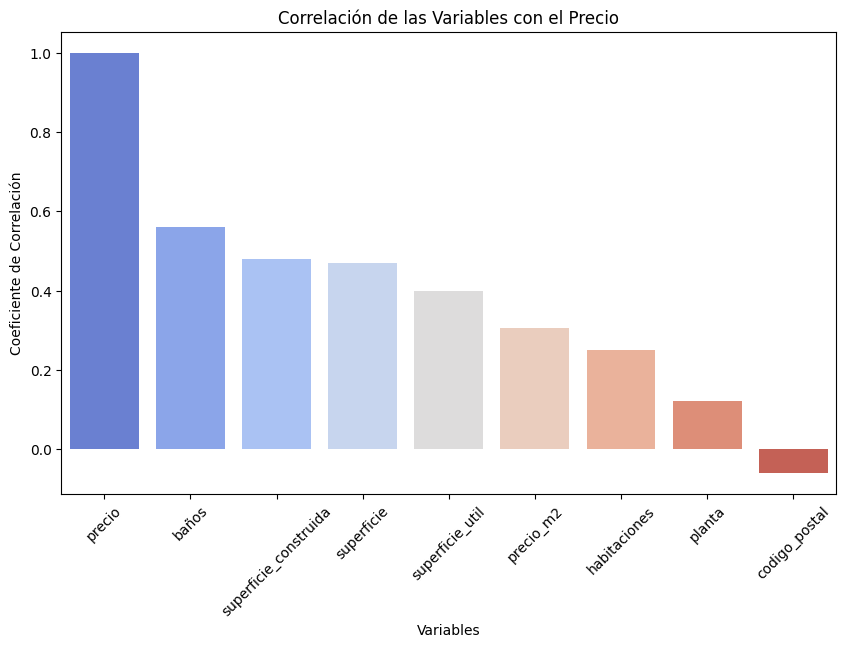

In [ ]:
#otra vista mas visual, de las columnas numericas
correlaciones_precio = df_numerico.corr()['precio'].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=correlaciones_precio.index, y=correlaciones_precio.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Correlación de las Variables con el Precio")
plt.xlabel("Variables")
plt.ylabel("Coeficiente de Correlación")
plt.show()



In [ ]:
# Mostrar la tabla de correlaciones en formato visual
#tools.display_dataframe_to_user(name="Correlaciones con Precio", dataframe=correlaciones_precio.to_frame())
#correlaciones_precio_df = correlaciones_precio.to_frame().reset_index()
#correlaciones_precio_df.columns = ["Variable", "Correlación con Precio"]
#print(correlaciones_precio_df.to_string(index=False))  # Para imprimir en formato claro

In [26]:
df.columns

Index(['identificador', 'nombre', 'href', 'agencia', 'timestamp', 'ubicacion',
       'CCAA', 'codigo_postal', 'planta', 'orientacion', 'precio', 'precio_m2',
       'antiguedad', 'actualizacion', 'superficie_util',
       'superficie_construida', 'superficie', 'habitaciones', 'baños',
       'cocina_equipada', 'amueblado', 'terraza', 'armarios_empotrados',
       'calefaccion', 'aire_acondicionado', 'ascensor', 'consumo',
       'emisiones'],
      dtype='object')

In [ ]:
df.shape

In [31]:
valores_vacios = (df.isnull().sum() / len(df2)) * 100
df_porcentaje2 = pd.DataFrame({'Columna': valores_vacios.index, 'Porcentaje_NaNs': valores_vacios.values})
df_porcentaje2 = df_porcentaje2.sort_values(by='Porcentaje_NaNs', ascending=False)
df_porcentaje2

,Columna,Porcentaje_NaNs
21,terraza,54.759239
12,antiguedad,53.767397
24,aire_acondicionado,53.639418
23,calefaccion,49.816029
22,armarios_empotrados,46.864502
14,superficie_util,42.577188
25,ascensor,41.345385
20,amueblado,36.818109
19,cocina_equipada,34.666453
8,planta,31.890897


In [ ]:
#voy a seguir quitando columnas que ha simple vista tienen muchos nan o me parecen irrelevantes